<a href="https://colab.research.google.com/github/bikrambiswajit/Formula-One-Data/blob/main/Real_Estate_Price_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Real Estate Price Predictor</h1>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
housing = pd.read_csv('/content/drive/MyDrive/Boston Real Estate Price Predictor/data.csv')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286433,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705748,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

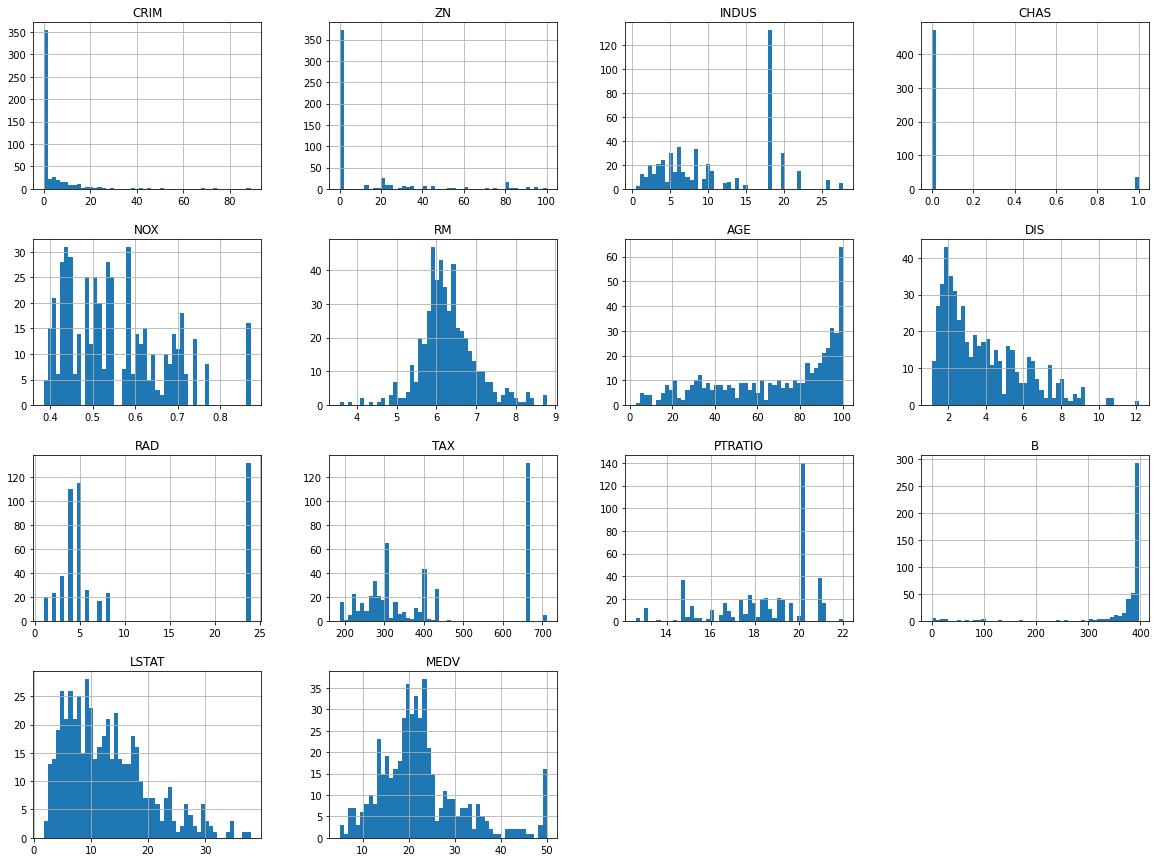

In [ ]:
housing.hist(bins=50, figsize=(20,15))
plt.show

In [ ]:
## Train Test Splitting
#import numpy as np
#def split_train_test(data, test_ratio):
 # np.random.seed(42)
  #shuffled = np.random.permutation(len(data))
  #test_set_size = int(len(data)*test_ratio)
  #test_indices = shuffled[:test_set_size]
  #train_indices = shuffled[test_set_size:]
  #return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
#train_set, test_set = split_train_test(housing, 0.2)

In [ ]:
#print(len(test_set))
#print(len(train_set))

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
housing = strat_train_set.copy()

**Looking For Coorelations**
---



In [ ]:
corr_matrix= housing.corr()

In [ ]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680655
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeea07ad50>,
      dtype=object)

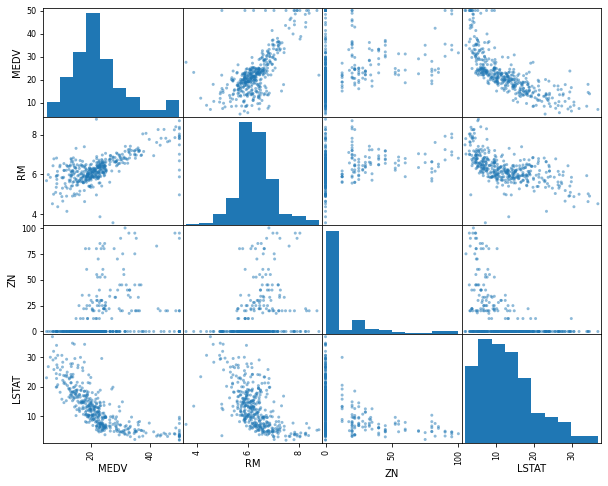

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(10,8))

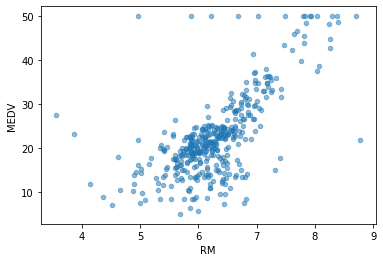

In [ ]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.5)

**Adding Attributes combinations**

In [ ]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [ ]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [ ]:
corr_matrix= housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.680655
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.530890
LSTAT     -0.740494
Name: MEDV, dtype: float64

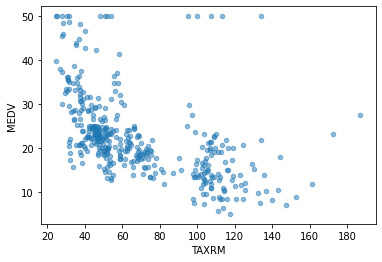

In [ ]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.5)

In [ ]:
housing_label = strat_train_set['MEDV'].copy()
housing = strat_train_set.drop("MEDV", axis=1)

 **#Filling Missing Attributes**

In [ ]:
housing.shape

(404, 13)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [ ]:
X = imputer.transform(housing)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [ ]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281290,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712576,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy="median")),
          ('std_scaler', StandardScaler())
])

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [ ]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

**Selecting the Model for the Dataset**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= LinearRegression()
#model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [ ]:
sample_data = housing.iloc[:5]
sample_label = housing_label[:5]
prepared_data = my_pipeline.transform(sample_data)

In [ ]:
model.predict(prepared_data)

array([22.363, 25.238, 16.645, 23.368, 23.556])

In [ ]:
list(sample_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

**Evaluating the Model**

In [ ]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
mse = mean_squared_error(housing_label, housing_prediction)
rmse = np.sqrt(mse)

In [ ]:
mse

1.476529289603958

**Looking for better Evaluation technique - Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

In [ ]:
rmse_scores

array([2.93183647, 3.56212808, 3.23277284, 4.13715776, 3.00756484])

In [ ]:
def print_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Std Dev: ", scores.std())

In [ ]:
print_scores(rmse_scores)

Scores:  [2.93183647 3.56212808 3.23277284 4.13715776 3.00756484]
Mean:  3.374291996136636
Std Dev:  0.43989315428269815


In [ ]:
#Comarision Reference

#Linear-reg
#Scores:  [4.20970029 4.47916942 4.95729155 6.34371299 5.28607171]
#Mean:  5.055189192150295
#Std Dev:  0.7442895312664995

#Descision-tree
#Scores:  [5.02200098 4.2416512  5.05334506 5.72038806 3.41990497]
#Mean:  4.691458053543281
#Std Dev:  0.7896950331768212

#Random-Forest
#Scores:  [2.89378203 3.6116407  3.14807838 4.14894403 3.02502459]
#Mean:  3.365493948302259
#Std Dev:  0.4604526698738536

**Saving the model**

In [ ]:
from joblib import dump, load
dump(model, 'predictor.joblib')

['predictor.joblib']

**Testing the Model**

In [ ]:
Y_test = strat_test_set["MEDV"]
X_test = strat_test_set.drop("MEDV", axis=1)
X_test_prepared = my_pipeline.transform(X_test)
my_result = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, my_result)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

2.873726277098476

In [ ]:
model.score(X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.04762826925523622

##**Model Usage**

In [ ]:
model_usage= load('predictor.joblib')

In [ ]:
features_usage = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24348891, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model_usage.predict(features_usage)

array([22.363])